# Migration, urban-bias and the informal sector

## The Harris-Todaro Model

This model is an adaptation of a standard two-sector open economy specific factors model (SFM) of migration.  
* The two sectors are agriculture and 'modern-manufacturing'
* The agricultural labor market is competitive. Labor is mobile between the agricultural and manufacturing sectors. 

If the market of jobs in the modern manufacturing sector were also competitive this would be a standard specific factors model and migration between sectors would occur until the wage was equalized across sectors, or same thing, at the market-clearing equilibrium wage $w^e$ the sum of labor demands from each sector equaled the economy-wide labor supply $\bar L$.

$$L_a (w^e) + L_a (w^e) = \bar L $$

However, for institutional/political economy reasons wages in the modern manufacturing sector will be set artificially high, for example by union activity or minimum-wage policies in that sector. This high wage will lead firms in that sector to cut back hiring but will also attract migrants to urban areas. lured by the prospect of possibly landing a high-wage job in the urban sector.  Since not all migrants succeed in landing these rationed jobs however this migration will lead to the endogenous emergence of an informal urban sector in the economy and 'urban-bias' (a larger than efficient urban sector).


Laborers can now either stay in the rural sector to earn wage equilibrium rural wage $w_r$ or migrate to the urban area where they may land either in (a) the informal sector where they earn a low-productivity determined wage $w_u$ or (b) in the high-wage modern manufacturing sector where they earn the institutionally-determined wage $w_m$.  We model assumes that only urban dwellers can apply for modern-manufacturing and that jobs are allocated among such applicants by lottery whenever those jobs are in excess demand. 

A fixed constant informal sector wage can be justified by assuming that the informal sector is competitive and production takes place with a simple low-productivity linear technology. Wages in that sector are then pinned to $w_u = a_u$ where $a_u$ is the constant marginal product of labor in the informal sector.  

Migration will now take place until the rural wage is equalized to the *expected* wage of an urban resident:

$$w_r = \frac{L_m (w_m)}{L_u + L_m (w_m)} \cdot w_m  + \frac{L_u}{L_u + L_m (w_m)} \cdot w_u $$

Labor demand in each sector will depend on product prices. Without loss of generality and to simplify let's normalize $P_r = 1$ and now call $p = \frac{P_r}{P_m}$ the relative price of agricultural goods. 

We can then write $L_r(w)$ as the solution to 

$$p \cdot F_L(\bar T, L_r) = w$$

and labor demand $L_m(w)$ as the solution to 

$$G_L(\bar K, L_m) = w$$

Given the assumption that jobs in the high-wage manufacturing sector are allocated by fair lottery the equilibium probability of getting such a job will be given simply by the share of the urban sector labor force in that sector. 

If, without loss of generality we normalize the informal sector wage $w_u$ to zero (we'll change that later) the equilbrium condition becomes just:

$$w_r = \frac{L_m (w_m)}{L_u + L_m (w_m)} \cdot w_m  $$

Since $w_m$ is fixed labor use in the modern manufacturing sector will be $L_m (w_m)$ and the market can be thought of as clearing at a rural wage $w_r$ and a size of the urban informal sector $L_u$ of just the right size to dissuade any further migration. 

Note that this condition can be re-written more simply as follows:

$$ w_m \cdot L_m = w_r \cdot ({\bar L  - L_r})  $$

Since $\bar L$, $w_m$ and hence also $L_m = L_m(w_m)$ are all fixed quantities this is an equation in two unknowns. 

We can solve for the two unknowns $w_r$ and $L_r$ from a system of two equations. 

The first is this last equation which is a rectangular hyperbola of the form $x \cdot y = \kappa$, where here $x = \bar L - L_r$ and $y = w_r$).  

The other equation is the competitive equilibrium condition 

$$p \cdot F_L(\bar K_r, L_r) = w_r$$

that at a competitive optimum the rural wage $w_r$ will be given by the marginal value product of labor in agriculture. 

###  Diagram analysis

Although this is a simple system of two non-linear equations in two unknowns, it's hard to get a tidy closed form solution for Cobb Douglas production functions. It is easy to see the solution graphically and solve for it numerically, however. 

Suppose production in the agricultural and manufacturing sectors is carried out by identical firms in each sector each employing the following linear homogenous Cobb-Douglas technologies:

$$G(\bar T, L_r)=A_r \bar T^{\alpha} \cdot  L_r^{1-\alpha}$$

$$F(\bar K, L_m)=A_m \bar K^{\beta} \cdot  L_m^{1-\beta}$$

Labor demand in manufacturing as a function of $w$:

$$L_m(w_m) = \left [ { \frac{A_m (1-\beta) \bar K}{w_m/P_m} } \right ]^\frac{1}{\beta} $$


and rural labor demand:

$$L_r(w_r) = \left [ { \frac{A_r (1-\alpha) \bar T}{w_r/P_r} } \right ]^\frac{1}{\alpha} $$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from scipy.optimize import bisect,newton
%matplotlib inline

In [2]:
Tbar = 200       # Fixed specific land in ag. 
Kbar = 200       # Fixed specific capital in manuf
Lbar = 400       # Total number of mobile workers
LbarMax = 400    # Lbar will be on slider, max value.
A = 1
p    = 1.00      # initial rel price of ag goods, p = Pa/Pm
alpha, beta = 0.75, 0.5  # labor share in ag, manuf

In [3]:
def F(L,T, A=1, alpha=0.5):
    return A*(T**alpha)*(L**(1-alpha))

def G(L, K, A=1, beta=0.5):
    return A*(K**beta)*(L**(1-beta))

def mplr(L,T=Tbar, A=1, alpha=0.5):
    return (1-alpha)*F(L,T,A,alpha)/L

def mplm(L, K=Kbar, A=1, beta=0.5):
    return (1-beta)*G(L,K,A,beta)/L

def Lm(w):
    return  Kbar*((p/w)*(A*(1-beta)))**(1/beta)

def expret(Lr,wm):
    return wm*Lm(wm)/(Lbar-Lr)

def expwage(Lr,wm,wu):
    return (wm*Lm(wm) + wu*(Lbar-Lm(wm)-Lr) )/(Lbar-Lr)

The efficient competitive equilibrium is given by the point where the two labor demand curves intersect. We solve for the level of agricultural employment at which there is zero excess demand for agricultural labor. This gives an equilibrium agricultural labor demand economy-wide equilibrium wage.

In [4]:
def effeq():
    ed = lambda L: mplr(L) - mplm(Lbar-L)
    LE = bisect(ed,10,Lbar-10)
    return mplr(LE), LE

A Harris-Todaro equilibrium is one where the rural wage equals the expected urban wage.  Diagramatically the equilibrium level of rural employtment is given by the intersection of the rural labor demand curve and the rectangular hyperbola running through $(w_m, L_m(w_m))$.

In [5]:
def harristodaro(wm,wu):
    LM = Lm(wm)
    WE, LE = effeq()
    hteq = lambda L: mplr(L) - (wm*LM + wu*(Lbar-LM-L) )/(Lbar-L)
    LR = newton(hteq, LE)
    WR =  mplr(LR)
    return WR, LR, LM, WE, LE

This next function plots the diagram.

In [6]:
def HTplot(wm, wu):
    WR, LR, LM, WE, LE = harristodaro(wm, wu)
    print('(wr, Lr), Lm, (we, le)=({:5.2f},{:5.0f}),{:5.0f},({:5.2f},{:5.0f},)'.format(WR, LR, LM, WE, LE))
    lr = np.arange(1,Lbar)
    lup = np.arange(LR-20, Lbar-LM+20)
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(lr[:-50], mplr(lr[:-50]), lw=2)
    ax.plot(lr[50:], mplm(Lbar-lr[50:]), lw=2)
    ax.plot(lup, expwage(lup, wm, wu), 'k',lw=1.5)
    ax.vlines(LR,0,WR, linestyles="dashed")
    ax.vlines(Lbar-LM,0,wm,linestyles="dashed")
    ax.hlines(wm,Lbar,Lbar-LM, linestyles="dashed")
    ax.hlines(WR,LR,Lbar, linestyles="dashed")
    ax.plot(Lbar-LM,wm,'ob')
    ax.text(Lbar,wm,'$w_m$',fontsize=16)
    ax.text(LE,WE*1.05,'$E$',fontsize=16)
    ax.text(LR,WR*1.10,'$Z$',fontsize=16)
    ax.text(Lbar-LM-10,wm*1.05,'$D$',fontsize=16)
    ax.text(Lbar,WR,'$w_r$',fontsize=16)
    ax.plot([LE,LR, Lbar-LM],[WE, WR, wm],'ok')
    ax.set_xlim(0, Lbar)
    ax.set_ylim(0, 1.25)
    ax.set_xlabel(r'$c_1$', fontsize=18)
    ax.set_ylabel('$c_2$', fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

The high institutional wage $w_m$ lowers demand for labor in the formal manufacturing sector relative to a competitive equilibiurm. In the Harris-Todaro model it's not apriori obvious whether the high institutional wage in the formal manufacturing sector will increase or decrease the size of the urban sector relative to the efficient competitive equilibrium.  Migrants have to weigh the lower probability of landing a formal sector job against the higher wage they will capture if they are lucky enough to get a job.  

If we assume the informal sector (or unemployment) wage is zero, then for our Cobb-Douglas demands the following diagram suggests the policy creates an informal urban sector but overall reduces the size of the size of the urban sector relative to the rural sector, compared to the efficient competitive equilibrium. 

(wr, Lr), Lm, (we, le)=( 0.43,  271),   62,( 0.50,  200,)


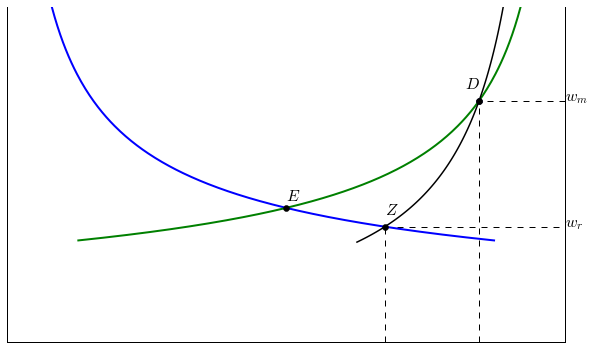

In [7]:
WM, WU = 0.9, 0
HTplot(WM, WU)

But if we make the informal sector sufficiently attractive it is possible to get 'urban-bias' or an excessively large urban sector relative to the efficient allocation. 

For the following diagram we first make note of the efficient equilibrium wage and rural sector size:

In [8]:
WE, LE = effeq()
print('The efficient competitive wage is w ={:5.2f} and the rural sector is Lr ={:5.0f}'.format(WE, LE))

The efficient competitive wage is w = 0.50 and the rural sector is Lr =  200


Suppose that workers in the informal sector have access to a low-productivity occupation which pays a wage below this efficient level.  That means that in an efficient allocation workers would earn more in either formal manufacturing or the rural sector and hence there would be no informal sector in equilibrium. 

However the existence of this low-productivity option in the urban informal sector raises the expected return to migration in the Harris-Todaro distorted equilibrium and as the following example illustrates this may result in a smaller than efficient rural sector:

(wr, Lr), Lm, (we, le)=( 0.56,  157),   62,( 0.50,  200,)


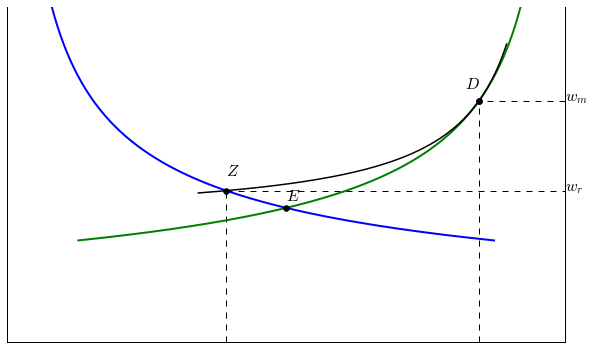

In [9]:
WM, WU = 0.9, 0.45
HTplot(WM, WU)

### Interactive plot

(wr, Lr), Lm, (we, le)=( 0.41,  290),   41,( 0.50,  200,)


<function __main__.HTplot>

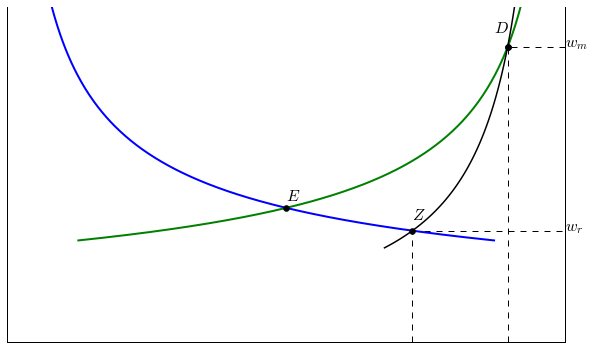

In [10]:
interact(HTplot, wm =(WE,3.5*WE,0.05),wu=(0,WE,0.05))

### Extensions

#### Harris Todaro and Inequality

Jonathan Temple's (2005) "[Growth and Wage Inequality in a dual economy](http://www.efm.bris.ac.uk/ecjrwt/abstracts/templeberfinalversion.pdf)" makes some simple points about wage inequality in the HT model.  He shows that in the case of $wu = $ the Gini coefficient can be written simply:

$$Gini = L_u(2-\frac{L_u}{u})$$

where here $L_u$ is the *proportion* of the labor force in unemployment and $u$ (slightly redefining what we had above... or, same thing, if we normalize the total labor force to 1) and $u$ is urban unemployment rate or the fraction of the unemployed in the urban population (i.e. $u=\frac{L_u}{L_u+L_m}$).  From this one can prove that inequality will unambiguously rise if one of the following statements holds if the urban unemployment rate $u$:

 - rises, and the number of unemployed $L_u$ goes up.
 - is constant, and the number of unemployed $L_u$ rises. Modern sector employment rises, and agricultural employment falls.
 - rises, and the number of unemployed is constant. Modern sector employment falls, and agricultural employment rises
 
Another result is that rural growth (driven say by improved agricultural technology) leads to an unambiguous reduction in wage inequality. The effects of urban growth are ambiguous.  

Below we plot the Lorenz curve and slightly extend Temple's analysis to the case where 'the unemployed' (or informal sector workers) earn a non-zero wage.  For now we simply focus on calculating the Gini numerically. 

(note/fix: GINI CALCULATION DOES NOT SEEM RIGHT)

In [11]:
def htlorenz(wm, wu):
    WR, LR, LM, WE, LE = harristodaro(wm, wu)
    lrp = LR/Lbar
    lmp = LM/Lbar
    lup = 1 - lrp -lmp
    ytot = wu*(1-lrp-lmp) + WR*lrp + wm*lmp
    yup = wu*(1-lrp-lmp)/ytot
    yrp = WR*lrp/ytot
    ymp = wm*lmp/ytot
    A = 0.5 - (yup*((1-lup)+ 0.5*lup)+(yrp-yup)*(lmp+0.5*lrp)+0.5*lmp*(ymp))
    Gini = 2*A
    gtext = "Gini ={:5.2f}".format(Gini)
    fig, ax = plt.subplots(figsize=(6,6))
    ax.plot([0,lup,lup+lrp,1],[0,yup,yup+yrp,1] , lw=2)
    ax.plot([0,1],[0,1], 'k--', lw=1)
    ax.text(0.2,0.8,gtext,fontsize=16)

<function __main__.htlorenz>

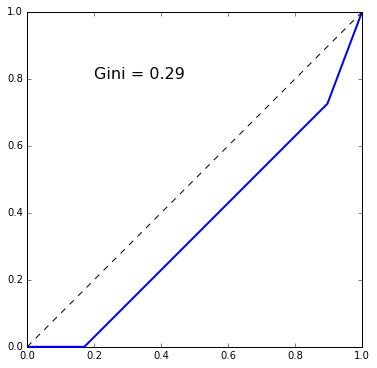

In [12]:
WM, WU = 0.9,0
WR, LR, LM, WE, LE = harristodaro(WM, WU)
interact(htlorenz, wm =(WE,3.5*WE,0.05),wu=(0,WE,0.05))